## 비교하는 방법

- **평균 비교 :** barplot
    - 범주가 2개 : 두 평균의 차이 비교
    - 범주가 3개 이상 : 전체 평균과 각 범주의 평균 비교
- **수치화** : t-test, anova(분산분석)
    - 범주가 **두 개**일 때와 **세 개 이상**일 때 평균을 비교하는 방법
    - **t-test (범주의 수 2개일 때 사용)**
        - **두 그룹간 평균**에 차이가 있는가?
        - 두그룹 A의 평균 vs 그룹 b의 평균 비교
        - t 통계량 : 두 그룹의 평균 간 차이를 표준오차로 나눈 값(두 평균의 차이로 이해해도 좋다) → 정규분포랑 많이 가깝다
        
        **T-test : t통계량, p-value**
        
        - p-value가 0.05보다 작으면 차이가 있다. ⇒ 데이터 간 관련이 있다
        - t 통계량이 -2보다 작거나, 2보다 크면, 차이가 있다고 본다. ⇒ 데이터 간 관련이 있다
        
        ---
        
    - **anova(범주의 수 3개 이상일 때 사용) : Analysis Of Variance**
        
        $F = 집단간 분산/집단내분산 = (전체평균- 각집단 평균)/(각집단의 평균 - 개별값)$
            
        - 전체 평균과 각 그룹 평균에 차이가 있는가 ?
        - [전체 평균과 그룹 평균의 차이(분산)]와 [그룹 내 차이(분산)]를 비교
        - 여러 집단 간에 차이 비교 : 기준은 **전체 평균**
        
        - 값이 대략 2~3이상이면 차이가 있다고 판단 ⇒ 데이터 간 관련이 있다
        
        ※ 주의 : 분산 분석은 전체 평균 대비 각 그룹 간 차이가 있는 지만 알려줌.
        
    

### 요약 : 범주 vs 숫자

**Focus** : 평균 비교

**시각화** : 평균 비교 barplot(sns.barplot)

- 평균과 신뢰 구간 비교

**수치화** : 상관분석

- 범주 2개 : t-test
    - 두 범주 간에 평균 비교
    - t-통계량 : -2보다 작거나, 2보다 크면 관계가 있다고 판단
    - p-value : 0.05보다 작으면 관계가 있다고 판단
- 범주가 3개 이상 : 분산 분석 (ANOVA)
    - [전체 평균과 각 범주의 평균의 차이(분산)] / [각 범주 내 분산]
    - f-통계량 : 2~3보다 크면 관계가 있다고 판단
    - p-value : 0.05보다 작으면 관계가 있다고 판단

# 0. 환경 준비

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. 시각화 (범주가 2개일 경우)

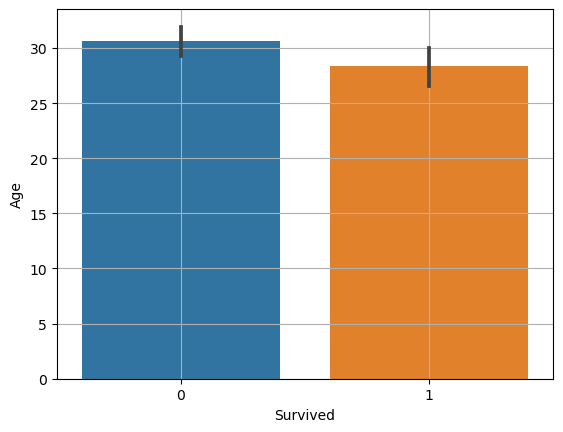

In [3]:
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

# 2. 수치화 (범주가 2개일 경우)

- t-test : 두 집단의 평균을 비교한다

In [5]:
# 먼저 NaN이 있는지 확인 !
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]

# 두 그룹으로 데이터 저장
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

# t-test 실행
spst.ttest_ind(survived, died)

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

# 3. 시각화 (범주가 3개 이상일 경우)

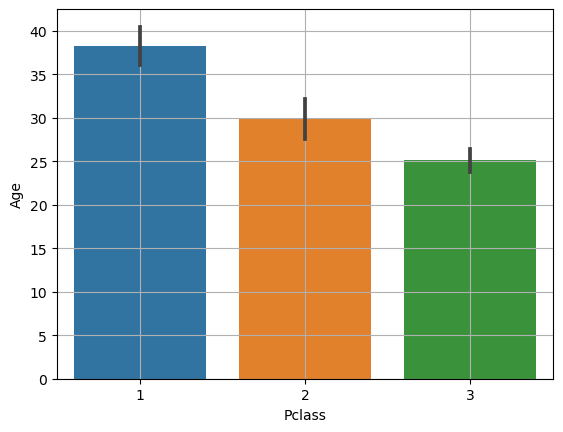

In [7]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

# 4. 수치화 (범주가 3개 이상일 경우)

In [8]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)